In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/football-match-probability-prediction/sample_submission.csv
/kaggle/input/football-match-probability-prediction/train.csv
/kaggle/input/football-match-probability-prediction/test.csv


In [2]:
train = pd.read_csv("../input/football-match-probability-prediction/train.csv", dtype=object)
train.head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


In [3]:
print("We have {0} recorded games, and approximately {1} equivalent history games".format(len(train), len(train)*10)) 

We have 110938 recorded games, and approximately 1109380 equivalent history games


### Start by looking at what sort of features we do have in the provided training dataset:

In [4]:
print(len(list(train.columns)),list(train.columns))

190 ['id', 'target', 'home_team_name', 'away_team_name', 'match_date', 'league_name', 'league_id', 'is_cup', 'home_team_coach_id', 'away_team_coach_id', 'home_team_history_match_date_1', 'home_team_history_match_date_2', 'home_team_history_match_date_3', 'home_team_history_match_date_4', 'home_team_history_match_date_5', 'home_team_history_match_date_6', 'home_team_history_match_date_7', 'home_team_history_match_date_8', 'home_team_history_match_date_9', 'home_team_history_match_date_10', 'home_team_history_is_play_home_1', 'home_team_history_is_play_home_2', 'home_team_history_is_play_home_3', 'home_team_history_is_play_home_4', 'home_team_history_is_play_home_5', 'home_team_history_is_play_home_6', 'home_team_history_is_play_home_7', 'home_team_history_is_play_home_8', 'home_team_history_is_play_home_9', 'home_team_history_is_play_home_10', 'home_team_history_is_cup_1', 'home_team_history_is_cup_2', 'home_team_history_is_cup_3', 'home_team_history_is_cup_4', 'home_team_history_is_cup

In [5]:
# a more refined version of the features
refined_column_names = []
for name in train.columns:
    try:
        int(name[-1])
        if (name[-1] == "1"):
            refined_column_names.append(name)
    except:
        refined_column_names.append(name)
            
        
refined_column_names
    

['id',
 'target',
 'home_team_name',
 'away_team_name',
 'match_date',
 'league_name',
 'league_id',
 'is_cup',
 'home_team_coach_id',
 'away_team_coach_id',
 'home_team_history_match_date_1',
 'home_team_history_is_play_home_1',
 'home_team_history_is_cup_1',
 'home_team_history_goal_1',
 'home_team_history_opponent_goal_1',
 'home_team_history_rating_1',
 'home_team_history_opponent_rating_1',
 'home_team_history_coach_1',
 'home_team_history_league_id_1',
 'away_team_history_match_date_1',
 'away_team_history_is_play_home_1',
 'away_team_history_is_cup_1',
 'away_team_history_goal_1',
 'away_team_history_opponent_goal_1',
 'away_team_history_rating_1',
 'away_team_history_opponent_rating_1',
 'away_team_history_coach_1',
 'away_team_history_league_id_1']

### One by one, we'll look at features and try to understand what potential they have:

**Match Dates**

In [6]:
column_name_list = ["home_team_history_match_date_" + str(i) for i in np.arange(1,11,1)]
column_name_list.insert(0, "match_date")
train[column_name_list][train.home_team_name =="Arsenal"].head(1)

,match_date,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10
1182,2019-12-05 20:15:00,2019-12-01 14:00:00,2019-11-28 20:00:00,2019-11-23 15:00:00,2019-11-09 17:30:00,2019-11-06 15:50:00,2019-11-02 15:00:00,2019-10-30 19:30:00,2019-10-27 16:30:00,2019-10-24 19:00:00,2019-10-21 19:00:00


It seems like we can decide:
- whether it is a night fixture or day fixture,
- a winter or summer game,
- fatigue, congestion and inherent injury information by looking at the tightness of the last 10 fixtures
-----

**Goals and Ratings**

1- Can we infer opponents' names for each game, by looking at the other data instances?

2- What is the relationship between goal difference and ratings for each game?

In [7]:
# find english premier league id in the dataset using the arsenal game discovered earlier on
print(train.loc[1182].league_name, train.loc[1182].league_id)

Premier League 8


In [8]:
# for each Arsenal game in the PL, create a dictionary to hold previous PL encounters where 
# keys are dates, and values are the results in the form (Is_Home, Result)

arsenal_home_encounters = dict()

cond1 = train.league_id == '8' # premier league
cond2 = train.is_cup == "False" # not a cup game
cond3 = train.home_team_name == 'Arsenal'# arsenal plays at home


train_subset = train[cond3  &  cond1 & cond2]
# record the match ids in a list to iterate later on
train_subset_ids = list(train_subset["id"])

train_subset.head(2)


,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
1182,11867366,away,Arsenal,Brighton & Hove Albion,2019-12-05 20:15:00,Premier League,8,False,148.0,452683.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,27.0,8.0
4005,11867386,away,Arsenal,Manchester City,2019-12-15 16:30:00,Premier League,8,False,148.0,455361.0,...,2.0,8.0,8.0,8.0,2.0,8.0,8.0,2.0,8.0,27.0


In [9]:
for id_n in train_subset_ids:
    for i in np.arange(1,11,1):
        if list(train_subset[train_subset.id == id_n][train_subset['home_team_history_is_cup_'+str(i)] == "0.0"])[0]:
            match_date = train_subset[train_subset.id == id_n]['home_team_history_match_date_' + str(i)].item()
            is_home = train_subset[train_subset.id == id_n]['home_team_history_is_play_home_' + str(i)].item()
            conceded = train_subset[train_subset.id == id_n]['home_team_history_goal_' + str(i)].item()
            scored = train_subset[train_subset.id == id_n]['home_team_history_opponent_goal_' + str(i)].item()
            result = "home" if scored > conceded else ("away" if scored < conceded else "draw")
            arsenal_home_encounters[match_date] = (is_home, result)
        else:
            pass


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# check whether for each recorded arsenal game, whether there is an entry in the dataframe with the 
# exact date, result, and arsenal as away team or home team. if no opponent can be found, 
# simply record None
opponents = []
for date, result_tuple in arsenal_home_encounters.items():
    cond1 = train.match_date == date
    cond2 = train.target == result_tuple[1]
    if result_tuple[0] == '1.0':
        cond3 = train.home_team_name == 'Arsenal'
        try:
            opponents.append(train[cond1 & cond2 & cond3].away_team_name.item())
        except:
            opponents.append(None)
    else:
        cond3 = train.away_team_name == 'Arsenal'
        try:
            opponents.append(train[cond1 & cond2 & cond3].home_team_name.item())
        except:
            opponents.append(None)


In [11]:
print(opponents[0:30])

['Norwich City', None, None, None, None, None, None, None, None, None, 'Standard Liège', 'West Ham United', None, 'AFC Bournemouth', 'Everton', None, None, 'Crystal Palace', None, None, 'Burnley', 'AFC Bournemouth', 'Chelsea', 'Sheffield United', 'Olympiakos Piraeus', None, 'Portsmouth', None, None, 'Sheffield United']


So it seems the answer to the first question is NO. We can infer some of the opponents names, but more than half of the history matches do not reside in the dataset themselves.

Let's pick 10 PL teams randomly and try to figure out whether there is a correlation between the the goal differences and the ratings given:

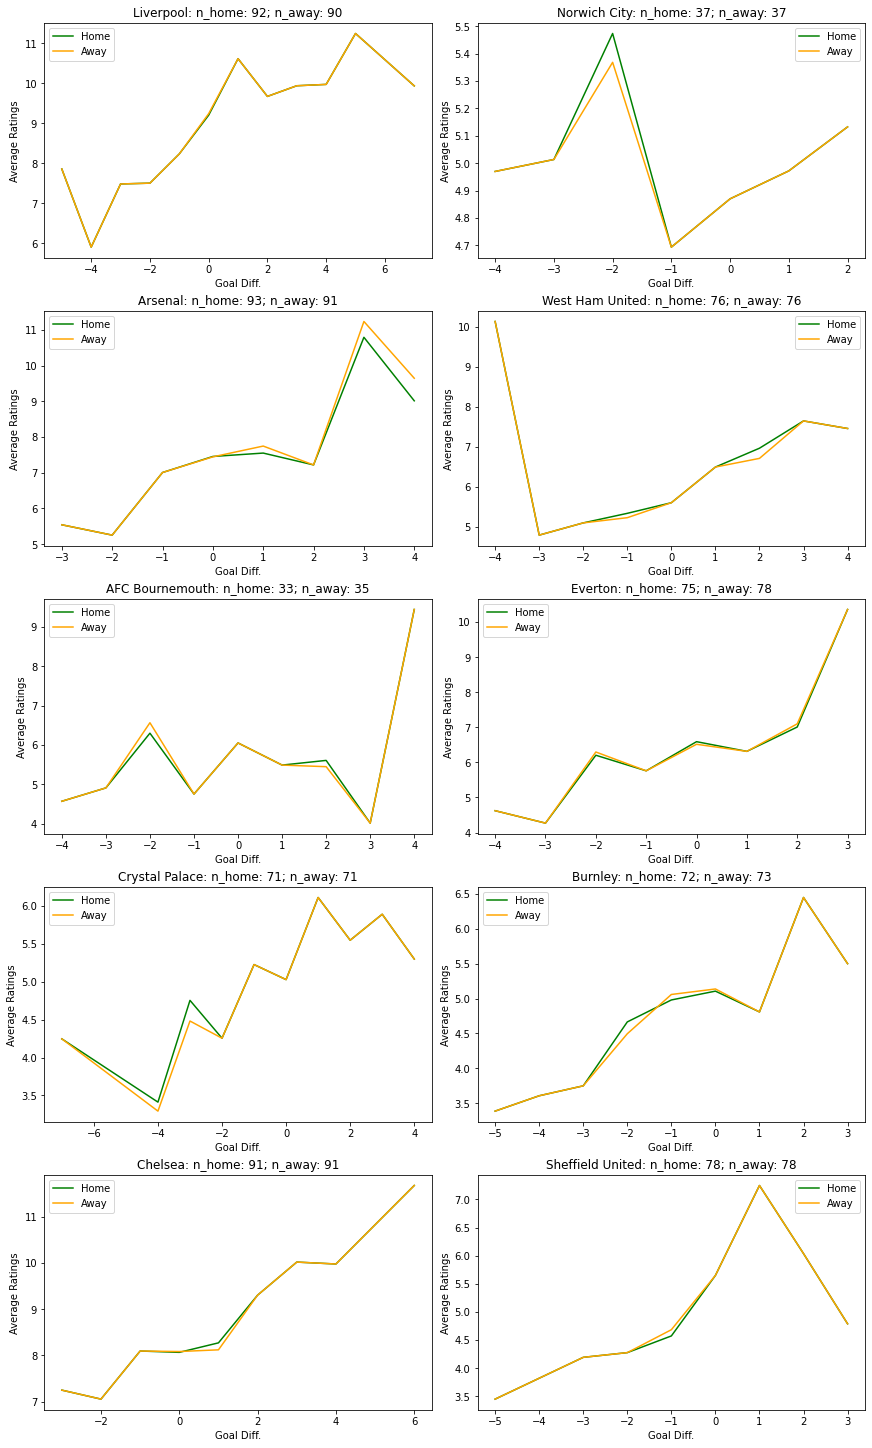

In [12]:
# pick ten English teams
teams = ['Liverpool', 'Norwich City', 'Arsenal', 'West Ham United', 'AFC Bournemouth', \
         'Everton', 'Crystal Palace', 'Burnley', 'Chelsea', 'Sheffield United']

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(12,20), constrained_layout=True)

for ax, team in zip(axes.flatten(), teams):
    # we look at games where the selected team either plays at home or away
    cond1 = train.home_team_name == team
    cond2 = train.away_team_name == team
    cond3 = train.league_id == "8" # for instance, in Argentina liga, there is another liverpool
    home_game_ids = list(train[cond1 & cond3].id)
    away_game_ids = list(train[cond2 & cond3].id)
    # for each game of that team, look at the recorded history, 
    # and store {date : (goal_scored, goal_conceded, rating)}
    home_stats, away_stats = {}, {}
    match_dates_home = ["home_team_history_match_date_" + str(i) for i in np.arange(1,11,1)]
    match_dates_away = ["away_team_history_match_date_" + str(i) for i in np.arange(1,11,1)]
    goals_for_home = ["home_team_history_goal_" + str(i) for i in np.arange(1,11,1)]
    goals_for_away = ["away_team_history_goal_" + str(i) for i in np.arange(1,11,1)]
    goals_aga_home = ["home_team_history_opponent_goal_" + str(i) for i in np.arange(1,11,1)]
    goals_aga_away = ["away_team_history_opponent_goal_" + str(i) for i in np.arange(1,11,1)]
    rating_home = ["home_team_history_rating_" + str(i) for i in np.arange(1,11,1)]
    rating_away = ["away_team_history_rating_" + str(i) for i in np.arange(1,11,1)]
    
    for id_n in home_game_ids:
        for d, gf, ga, r in zip(match_dates_home, goals_for_home, goals_aga_home, rating_home):
            entry = train[train.id == id_n]
            home_stats[entry[d].item()] = (float(entry[gf].item()),float(entry[ga].item()),float(entry[r].item()))
    d2r_home = {stat[0]-stat[1]:[0,0] for stat in home_stats.values()}

    for stat in home_stats.values():
        d2r_home[stat[0]-stat[1]][0] += stat[2] # add the rating
        d2r_home[stat[0]-stat[1]][1] += 1 # add one to rating count
        
    # repeat the same for away games
    for id_n in away_game_ids:
        for d, gf, ga, r in zip(match_dates_away, goals_for_away, goals_aga_away, rating_away):
            entry = train[train.id == id_n]
            away_stats[entry[d].item()] = (float(entry[gf].item()),float(entry[ga].item()),float(entry[r].item()))
    
    d2r_away = {stat[0]-stat[1]:[0,0] for stat in away_stats.values()}

    for stat in away_stats.values():
        d2r_away[stat[0]-stat[1]][0] += stat[2] # add the rating
        d2r_away[stat[0]-stat[1]][1] += 1 # add one to rating count
    
    # sort the dicts
    d2r_home = dict(sorted(d2r_home.items()))
    d2r_away = dict(sorted(d2r_away.items()))
        
    # prepare plot inputs
    x_home, x_away = d2r_home.keys(), d2r_away.keys()
    y_home = [stat[0]/stat[1] for stat in d2r_home.values()]
    y_away= [stat[0]/stat[1] for stat in d2r_away.values()]
    
    # find the sample size for home and away
    n_home = sum([i[1] for i in d2r_home.values()])
    n_away = sum([i[1] for i in d2r_away.values()])
        
    ax.plot(x_home, y_home, color = "green", label = "Home")
    ax.plot(x_away, y_away, color = "orange", label = "Away")
    
    # add axes labels
    ax.set_xlabel('Goal Diff.')
    ax.set_ylabel('Average Ratings')
    
    # add team name as the ax title
    
    ax.set_title("{0}: n_home: {1}; n_away: {2}".format(team, n_home, n_away))
    # turn on the legend
    ax.legend()
    
plt.show()




Four major observations:
- There is not much difference between away and home game ratings. I thought maybe a 1 goal diff win at home vs away should have different average ratings, since winning away is much harder. But doesn't seem so.
- Bigger teams have better averages overall. For instance, a 1-goal win of Chelsea or Liverpool results in a rating of at least 8 on average. Same win by Bournemouth or Norwich, you get 5 or 6. <code style="background:yellow;color:black">We need to give each team a rating relative to its overall rating performance for each match. It can be normalized between -1 and 1.</code>
- If we disregard extreme results like $\pm$ 3, usually we have a direct correlation between rating and goal diff, but not always. 
- There might be another issue: What happens when a team wins but gets disqualified due to aggregate? Not being able to deliver what matters might also be an indicator of the rating. Also a good team trashes a lower league team, thus should not receive that much credit for that. I would expect much more chaos. To understand it, i removed the cup games from home history matches in one of my runs, and noticed that the ratings go actually higher for moderate goal differences. But could be diffeent for different configutations.


-----


****

**Match History Dates**

We know that for each game, the teams in the competition will come with 10 previous match stats. But how close these matches actually? For instance, there might be games from the previous season, which is a bummer because everything changes when the season restarts.

In [13]:
import datetime

# copy main dataframe into a subset in which we only have dates
column_name_list = ["home_team_history_match_date_" + str(i) for i in np.arange(1,11,1)]
column_name_list.insert(0, "match_date")
date_train = train[column_name_list].copy()

# convert all datetimes to dates
for i, name in enumerate(column_name_list):
    date_train['match_'+ str(i)] = pd.to_datetime(date_train[name]).dt.date

# create 10 new columns, where each column will represent the days between history game i, and that days game
for i in np.arange(1,11,1):
    date_train["diff_" + str(i)] = date_train["match_0"] - date_train["match_"+str(i)]

In [14]:
date_train.head(2)

,match_date,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,...,diff_1,diff_2,diff_3,diff_4,diff_5,diff_6,diff_7,diff_8,diff_9,diff_10
0,2019-12-01 00:45:00,2019-11-26 00:10:00,2019-11-10 18:30:00,2019-11-03 18:30:00,2019-10-29 22:10:00,2019-10-19 20:45:00,2019-10-04 22:00:00,2019-09-28 23:00:00,2019-09-22 14:00:00,2019-09-15 18:30:00,...,5 days,21 days,28 days,33 days,43 days,58 days,64 days,70 days,77 days,91 days
1,2019-12-01 01:00:00,2019-11-27 21:00:00,2019-11-24 01:00:00,2019-11-10 01:00:00,2019-11-02 21:30:00,2019-10-27 01:00:00,2019-10-24 01:00:00,2019-10-21 00:00:00,2019-10-18 01:00:00,2019-10-06 01:00:00,...,4 days,7 days,21 days,29 days,35 days,38 days,41 days,44 days,56 days,63 days


<AxesSubplot:ylabel='Frequency'>

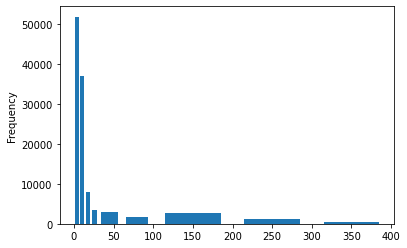

In [15]:
# plot the distribution of differences for each match in the history
# (i.e plot all differences between today's game and history game i)
date_train["diff_1"].dt.days.plot(kind = 'hist', bins = [0,7,14,21,30,60,100,200,300,400], rwidth = 0.7)


It figures that there are a lot of previous game dates that are more than one month old. Let's get a more comprehensive idea by working with spread analysis metrics.

In [16]:
date_train[["diff_1", "diff_2", "diff_3"]].describe()

,diff_1,diff_2,diff_3
count,109779,108487,107165
mean,17 days 19:58:14.143688683,34 days 22:57:09.800805626,51 days 06:22:54.426351887
std,46 days 10:26:32.731304057,63 days 23:30:09.101627286,76 days 05:48:40.253330001
min,0 days 00:00:00,2 days 00:00:00,3 days 00:00:00
25%,4 days 00:00:00,10 days 00:00:00,15 days 00:00:00
50%,7 days 00:00:00,14 days 00:00:00,21 days 00:00:00
75%,9 days 00:00:00,22 days 00:00:00,40 days 00:00:00
max,763 days 00:00:00,763 days 00:00:00,763 days 00:00:00


Even looking at the match day differences for the last 3 games reveals some important results. The median is good and 7 days for the difference between today's game and the last played game (for the home teams only). However the mean is much higher than that, suggesting a lot of outliers with a lot of days in between. It is also interesting that some data instances have 0 days in between. Let's find examples from two extremes to look further.

In [17]:
too_late, too_early = [], []
for i, item in enumerate(date_train["diff_1"].dt.days):
    if (item == 763.0): # 763.0 is the max
        too_late.append(i)
    elif (item == 0.0):
        too_early.append(i)
    else:
        pass

In [18]:
train.loc[too_early[0]][["id","home_team_name", "match_date", "home_team_history_match_date_1"]]

id                                           11996633
home_team_name                           Union Berlin
match_date                        2020-01-06 15:00:00
home_team_history_match_date_1    2020-01-06 10:00:00
Name: 7102, dtype: object

In [19]:
train[train.id == "11996633"][column_name_list]

,match_date,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10
7102,2020-01-06 15:00:00,2020-01-06 10:00:00,2019-12-22 14:30:00,2019-12-17 19:30:00,2019-12-14 14:30:00,2019-12-08 14:30:00,2019-11-29 19:30:00,2019-11-23 14:30:00,2019-11-13 16:30:00,2019-11-09 14:30:00,2019-11-02 17:30:00


In [20]:
train.loc[too_late[0]][["id", "home_team_name", "match_date", "home_team_history_match_date_1"]]

id                                           17201654
home_team_name                       Acheron Kanalaki
match_date                        2021-04-25 13:30:00
home_team_history_match_date_1    2019-03-24 13:00:00
Name: 109557, dtype: object

In [21]:
train[train.id == "17201654"][column_name_list]

,match_date,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10
109557,2021-04-25 13:30:00,2019-03-24 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is the first time that i realize that some columns have NaN values. Should have done that earlier. Let's check whether there are other columns for this particular team:

In [22]:
train[(train.home_team_name == "Acheron Kanalaki") | (train.away_team_name == "Acheron Kanalaki")][column_name_list]

,match_date,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10
109557,2021-04-25 13:30:00,2019-03-24 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Actually no. Without further analysis, I'd like to summarize some of the key learnings:  
- There might be NaN values for many teams. My idea is to use the historical data as a distribution where the closest games will have more effect on today. For instance, imagine a FORM factor. If the team has lost the last 3 games, but won in the 7 before that, we would rather expect the team to be in a bad form, even though they won many games before their bad strike, but we would expect them to be in better shape than a team that hasn't won a single game in their last 10. Therefore their form might be calculated as $\sum{x_{i}*w_{i}}$, where $x_{i}$'s represent the points taken in the $i^{th}$ game before today's match and the $w_{i}$'s are the importance or relevance of that match. In that setup, we'd expect the $w_{i}$'s to assume a Poisson-like distribution, so that each games importance diminishes over time. Teams with a lot of NaN values won't get much info in this scenario i suppose.
- Another idea was to apply a FATIGUE factor. However in this case i don't know how applicable it would be. There are some rows with 0 days in between matches, plus many rows that show more than 100 days in between the last two games. These values are simply problematic and point to some sort of discrepancy or missing information in the data, because in proffessional football we'd expect less than 30 days in between games unless it is summer break. If there is a lot of data missing, we cannot just assume some team hasn't played a single game in the last 100 days and has therefore zero fatigue.

So now, change some orientation and try to understand the distribution of NaN values, how many teams appear how many times, and other presence/absence dichotomies:

I'd like to start by seeing in fact what percentage of home and away previous matches actually come with meaningful values. By meaningful, i will pursue two criteria:
- shouldn't be NaN
- the difference between two neighbouring matches in the history (and in present) should be at most 30 days. Otherwise I take it as a data issue, or maybe a recording from the previous season which doesn't have any effect today

In [23]:
import datetime

# create a dataframe of 1 match date, and 10 historical match dates for both sides, a total of 21 dates
home_dates = ["home_team_history_match_date_" + str(i) for i in np.arange(1,11,1)]
away_dates = ["away_team_history_match_date_" + str(i) for i in np.arange(1,11,1)]
match_date = ["match_date"]
date_columns = match_date + home_dates + away_dates
dates = train[date_columns].copy()
dates.head(2)


,match_date,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,...,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10
0,2019-12-01 00:45:00,2019-11-26 00:10:00,2019-11-10 18:30:00,2019-11-03 18:30:00,2019-10-29 22:10:00,2019-10-19 20:45:00,2019-10-04 22:00:00,2019-09-28 23:00:00,2019-09-22 14:00:00,2019-09-15 18:30:00,...,2019-11-23 20:00:00,2019-11-15 00:10:00,2019-11-10 14:00:00,2019-11-02 23:00:00,2019-10-30 00:20:00,2019-10-23 00:30:00,2019-10-18 22:00:00,2019-10-11 23:30:00,2019-10-06 20:45:00,2019-10-02 00:30:00
1,2019-12-01 01:00:00,2019-11-27 21:00:00,2019-11-24 01:00:00,2019-11-10 01:00:00,2019-11-02 21:30:00,2019-10-27 01:00:00,2019-10-24 01:00:00,2019-10-21 00:00:00,2019-10-18 01:00:00,2019-10-06 01:00:00,...,2019-11-27 21:00:00,2019-11-23 23:00:00,2019-11-09 22:00:00,2019-11-02 21:00:00,2019-10-28 00:00:00,2019-10-21 00:00:00,2019-10-16 21:00:00,2019-09-29 01:00:00,2019-09-20 21:30:00,2019-09-15 01:00:00


In [24]:
# now add 20 new diff columns, in which we'll see the integer diff of each game with its predecessor,
# away and home separately
for i, name in enumerate(match_date + home_dates[:-1]):
    dates["home_diff_"+str(i)] = (pd.to_datetime(dates[name]).dt.date - pd.to_datetime(dates[home_dates[i]]).dt.date).dt.days
for i, name in enumerate(match_date + away_dates[:-1]):
    dates["away_diff_"+str(i)] = (pd.to_datetime(dates[name]).dt.date - pd.to_datetime(dates[away_dates[i]]).dt.date).dt.days
    


In [25]:
dates.head(2)

,match_date,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,...,away_diff_0,away_diff_1,away_diff_2,away_diff_3,away_diff_4,away_diff_5,away_diff_6,away_diff_7,away_diff_8,away_diff_9
0,2019-12-01 00:45:00,2019-11-26 00:10:00,2019-11-10 18:30:00,2019-11-03 18:30:00,2019-10-29 22:10:00,2019-10-19 20:45:00,2019-10-04 22:00:00,2019-09-28 23:00:00,2019-09-22 14:00:00,2019-09-15 18:30:00,...,8.0,8.0,5.0,8.0,3.0,7.0,5.0,7.0,5.0,4.0
1,2019-12-01 01:00:00,2019-11-27 21:00:00,2019-11-24 01:00:00,2019-11-10 01:00:00,2019-11-02 21:30:00,2019-10-27 01:00:00,2019-10-24 01:00:00,2019-10-21 00:00:00,2019-10-18 01:00:00,2019-10-06 01:00:00,...,4.0,4.0,14.0,7.0,5.0,7.0,5.0,17.0,9.0,5.0


In [26]:
# now using the differences, calculate the usable data percentage for each game
# i.e for any game, if the preceding game date is given + that date is at most 30 days away, then count
# as usable, otherwise non-usable. report the percentage of usables for each game column


usables = {}
n_total_games = len(dates[match_date])

for i in np.arange(0,10,1):
    usables["home_team_"+str(i)] = (1- (dates["home_diff_" + str(i)].isnull().sum() +\
                len(dates[dates["home_diff_" + str(i)] >= 30.0])) / n_total_games) * 100
    usables["away_team_"+str(i)] = (1 -(dates["away_diff_" + str(i)].isnull().sum() +\
                len(dates[dates["away_diff_" + str(i)] >= 30.0])) / n_total_games) * 100

usables

{'home_team_0': 90.51542302907932,
 'away_team_0': 89.77086300456111,
 'home_team_1': 89.34359732463177,
 'away_team_1': 89.03621842831132,
 'home_team_2': 88.41785501811823,
 'away_team_2': 87.89864609060916,
 'home_team_3': 87.40467648596513,
 'away_team_3': 86.97290378409562,
 'home_team_4': 86.35994880023075,
 'away_team_4': 85.93268312030142,
 'home_team_5': 85.39724891380772,
 'away_team_5': 84.83567398006093,
 'home_team_6': 84.36964791144604,
 'away_team_6': 83.88108673313022,
 'home_team_7': 83.42677892155979,
 'away_team_7': 82.82013376841118,
 'home_team_8': 82.37484000072112,
 'away_team_8': 81.9178279759866,
 'home_team_9': 81.41935134940238,
 'away_team_9': 80.89924101750528}

In [27]:
len(train.home_team_history_match_date_6)

110938

In [28]:
train.home_team_history_match_date_6.isnull().sum()

7896

In [29]:
train[(train.home_team_name == "Acheron Kanalaki")]["home_team_history_match_date_2"].isnull().values.any()

True

In [30]:
from collections import Counter
Counter(list(train["home_team_name"])+list(train["away_team_name"])).values()

dict_values([36, 63, 46, 54, 48, 26, 28, 28, 27, 30, 46, 1, 12, 14, 15, 45, 41, 36, 54, 54, 42, 23, 36, 41, 39, 25, 11, 12, 42, 56, 54, 20, 20, 39, 34, 37, 28, 24, 35, 2, 28, 27, 33, 29, 9, 11, 10, 10, 8, 24, 26, 7, 3, 8, 37, 13, 5, 11, 25, 48, 16, 27, 10, 40, 40, 22, 39, 11, 22, 14, 11, 34, 12, 12, 9, 38, 16, 54, 33, 11, 26, 19, 24, 46, 48, 50, 37, 30, 28, 21, 33, 26, 21, 34, 43, 35, 12, 30, 37, 33, 35, 20, 29, 37, 30, 39, 27, 38, 67, 38, 29, 23, 30, 57, 55, 29, 41, 35, 40, 18, 36, 21, 45, 27, 36, 37, 20, 24, 31, 39, 50, 17, 21, 41, 48, 20, 42, 42, 21, 36, 43, 32, 40, 24, 34, 67, 37, 45, 39, 37, 25, 33, 36, 36, 44, 40, 17, 65, 61, 86, 33, 34, 115, 10, 12, 31, 38, 37, 41, 41, 65, 48, 22, 21, 54, 113, 30, 48, 102, 61, 54, 37, 40, 42, 39, 20, 14, 8, 26, 27, 26, 24, 27, 32, 36, 38, 13, 61, 16, 24, 28, 59, 48, 50, 55, 14, 53, 46, 55, 27, 14, 5, 26, 44, 33, 3, 21, 45, 44, 46, 46, 13, 64, 39, 12, 17, 13, 10, 49, 52, 23, 20, 23, 38, 38, 56, 9, 18, 36, 25, 59, 12, 61, 12, 14, 53, 11, 16, 37, 3